In [1]:
# Imports usuales

import tensorflow as tf
import tensorflow.contrib.keras as keras
import numpy as np
L = keras.layers
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
labelToCat = {
    "Apple": 0,
    "Banana": 1,
    "Cocos": 2,
    "Grape": 3,
    "Kiwi": 4,
    "Lemon": 5,
}

catToLabel = {
    0: "Apple",
    1: "Banana",
    2: "Cocos",
    3: "Grape",
    4: "Kiwi",
    5: "Lemon",
}

import zipfile

def readImagesAndLabelsFromZipfile(filepath, MAXFILE=-1, SKIP=4):
    imdata = []
    labels = np.array([])
    nImgs = 0
    skip = 0
    zfile = zipfile.ZipFile(filepath)
    for finfo in zfile.infolist():
        fname = finfo.filename
        if(fname.startswith("_")==False and fname.startswith(".")==False and fname.endswith("jpg")==True):
            if(skip%SKIP==0):
                label = fname.split("/")[1]
                handle = zfile.open(finfo)
                image = np.array(Image.open(handle).resize((224, 224))) / 255.0
                imdata.append(image.reshape(224*224*3))
                if(nImgs%100==0):
                    print(str(nImgs) + " files loaded")
                labels = np.append(labels, labelToCat[label])
                nImgs = nImgs + 1
                if(nImgs==MAXFILE):
                    return (np.array(imdata).reshape(nImgs, 224, 224, 3), labels.reshape(nImgs, 1))
            skip = skip + 1
    return (np.array(imdata).reshape(nImgs, 224, 224, 3), labels.reshape(nImgs, 1))


In [3]:
imgs, labels = readImagesAndLabelsFromZipfile("./FruitsDataset-6-Train.zip")

0 files loaded
100 files loaded
200 files loaded
300 files loaded
400 files loaded
500 files loaded
600 files loaded
700 files loaded


In [4]:
testimgs, testlabels = readImagesAndLabelsFromZipfile("./FruitsDataset-6-Test.zip")

0 files loaded
100 files loaded
200 files loaded


In [5]:
one_hot_labels = tf.keras.utils.to_categorical(labels, 6)

Apple


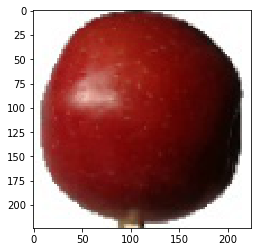

In [8]:
plt.imshow(imgs[0])
print(catToLabel[labels[0][0]])

In [17]:
def Classify(imdata):
    return catToLabel[np.argmax(new_model.predict(imdata))]